Math 5750/6880: Mathematics of Data Science \
Project 3

# 1. Fashion-MNIST image classification using sklearn

(Fashion-MNIST image classification using sklearn) In this exercise, you will build a
classifier for the Fashion-MNIST image dataset using the sklearn MLPClassifier. Use the provided
code to import and preprocess the Fashion-MNIST image dataset. Build a dense neural network
using MLPClassifier. Start with a simple model architecture and train your model. Then experiment with your model/training method by changing:
• the number of hidden layers and neurons
• the activation functions
• optimization method and the learning rate
• regularization or early stopping settings.
Observe how each change affects convergence speed and accuracy. In your final report, discuss
your findings and compare the accuracy scores, training times, and confusion matrices for models considered.

In [32]:
from tensorflow.keras.datasets import fashion_mnist
from sklearn.preprocessing import StandardScaler

# Load Fashion-MNIST
# Classes (0-9): T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, Ankle boot
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train = X_train.reshape(len(X_train), -1)
X_test  = X_test.reshape(len(X_test), -1)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import time
import matplotlib.pyplot as plt
import numpy as np

# Class names for Fashion-MNIST
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Dictionary to store results
results = {}

In [47]:
# Train 6 models: 1 base + 4 experimental + 1 final optimized
models = {}

# Model 1: Base Simple Model
print("Training Model 1: Base Simple Model")
start_time = time.time()
model1 = MLPClassifier(hidden_layer_sizes=(128,), max_iter=50, random_state=42)
model1.fit(X_train, y_train)
train_time1 = time.time() - start_time
y_pred1 = model1.predict(X_test)
acc1 = accuracy_score(y_test, y_pred1)
models['1_Base_Simple'] = {'model': model1, 'accuracy': acc1, 'time': train_time1, 
                            'y_pred': y_pred1, 'description': 'Single layer (128)'}
print(f"Accuracy: {acc1:.4f}, Time: {train_time1:.2f}s\n")

# Model 2: More Hidden Layers and Neurons
print("Training Model 2: More Layers/Neurons")
start_time = time.time()
model2 = MLPClassifier(hidden_layer_sizes=(256, 128, 64), max_iter=50, random_state=42)
model2.fit(X_train, y_train)
train_time2 = time.time() - start_time
y_pred2 = model2.predict(X_test)
acc2 = accuracy_score(y_test, y_pred2)
models['2_More_Layers'] = {'model': model2, 'accuracy': acc2, 'time': train_time2,
                           'y_pred': y_pred2, 'description': '3 layers (256,128,64)'}
print(f"Accuracy: {acc2:.4f}, Time: {train_time2:.2f}s\n")

# Model 3: Different Activation Function (tanh instead of relu)
print("Training Model 3: Different Activation (tanh)")
start_time = time.time()
model3 = MLPClassifier(hidden_layer_sizes=(128,), activation='tanh', max_iter=50, random_state=42)
model3.fit(X_train, y_train)
train_time3 = time.time() - start_time
y_pred3 = model3.predict(X_test)
acc3 = accuracy_score(y_test, y_pred3)
models['3_Tanh_Activation'] = {'model': model3, 'accuracy': acc3, 'time': train_time3,
                               'y_pred': y_pred3, 'description': 'Tanh activation'}
print(f"Accuracy: {acc3:.4f}, Time: {train_time3:.2f}s\n")

# Model 4: Different Optimizer and Learning Rate
print("Training Model 4: lbfgs optimizer")
start_time = time.time()
model4 = MLPClassifier(hidden_layer_sizes=(128,), solver='lbfgs', max_iter=50, random_state=42)
model4.fit(X_train, y_train)
train_time4 = time.time() - start_time
y_pred4 = model4.predict(X_test)
acc4 = accuracy_score(y_test, y_pred4)
models['4_lbfgs'] = {'model': model4, 'accuracy': acc4, 'time': train_time4,
                       'y_pred': y_pred4, 'description': 'Lbfgs'}
print(f"Accuracy: {acc4:.4f}, Time: {train_time4:.2f}s\n")

# Model 5: With Regularization and Early Stopping
print("Training Model 5: Regularization + Early Stopping")
start_time = time.time()
model5 = MLPClassifier(hidden_layer_sizes=(128,), alpha=0.01, early_stopping=True, 
                       validation_fraction=0.1, max_iter=50, random_state=42)
model5.fit(X_train, y_train)
train_time5 = time.time() - start_time
y_pred5 = model5.predict(X_test)
acc5 = accuracy_score(y_test, y_pred5)
models['5_Regularized'] = {'model': model5, 'accuracy': acc5, 'time': train_time5,
                           'y_pred': y_pred5, 'description': 'Alpha=0.01, Early Stop'}
print(f"Accuracy: {acc5:.4f}, Time: {train_time5:.2f}s\n")

print("Training Model 6: Optimal Model")
start_time = time.time()
model6 = MLPClassifier(hidden_layer_sizes=(256,128,), alpha=0.01, early_stopping=True, 
                       validation_fraction=0.1, max_iter=100, random_state=42, learning_rate='adaptive')
model6.fit(X_train, y_train)
train_time6 = time.time() - start_time
y_pred6 = model6.predict(X_test)
acc6 = accuracy_score(y_test, y_pred6)
models['6_Final_Optimized'] = {'model': model6, 'accuracy': acc6, 'time': train_time6,
                           'y_pred': y_pred6, 'description': 'Alpha=0.01, Early Stop'}
print(f"Accuracy: {acc6:.4f}, Time: {train_time6:.2f}s\n")
# Store results for later use
results.update(models)
print("All models trained successfully!")


Training Model 1: Base Simple Model


/Users/bodepacker/Documents/GitHub/Math_for_DS/venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.8856, Time: 11.01s

Training Model 2: More Layers/Neurons


/Users/bodepacker/Documents/GitHub/Math_for_DS/venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.8831, Time: 28.87s

Training Model 3: Different Activation (tanh)


/Users/bodepacker/Documents/GitHub/Math_for_DS/venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.8784, Time: 11.18s

Training Model 4: lbfgs optimizer


/Users/bodepacker/Documents/GitHub/Math_for_DS/venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 50 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=50).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Accuracy: 0.8730, Time: 6.64s

Training Model 5: Regularization + Early Stopping
Accuracy: 0.8881, Time: 6.93s

Training Model 6: Optimal Model
Accuracy: 0.8939, Time: 12.93s

All models trained successfully!


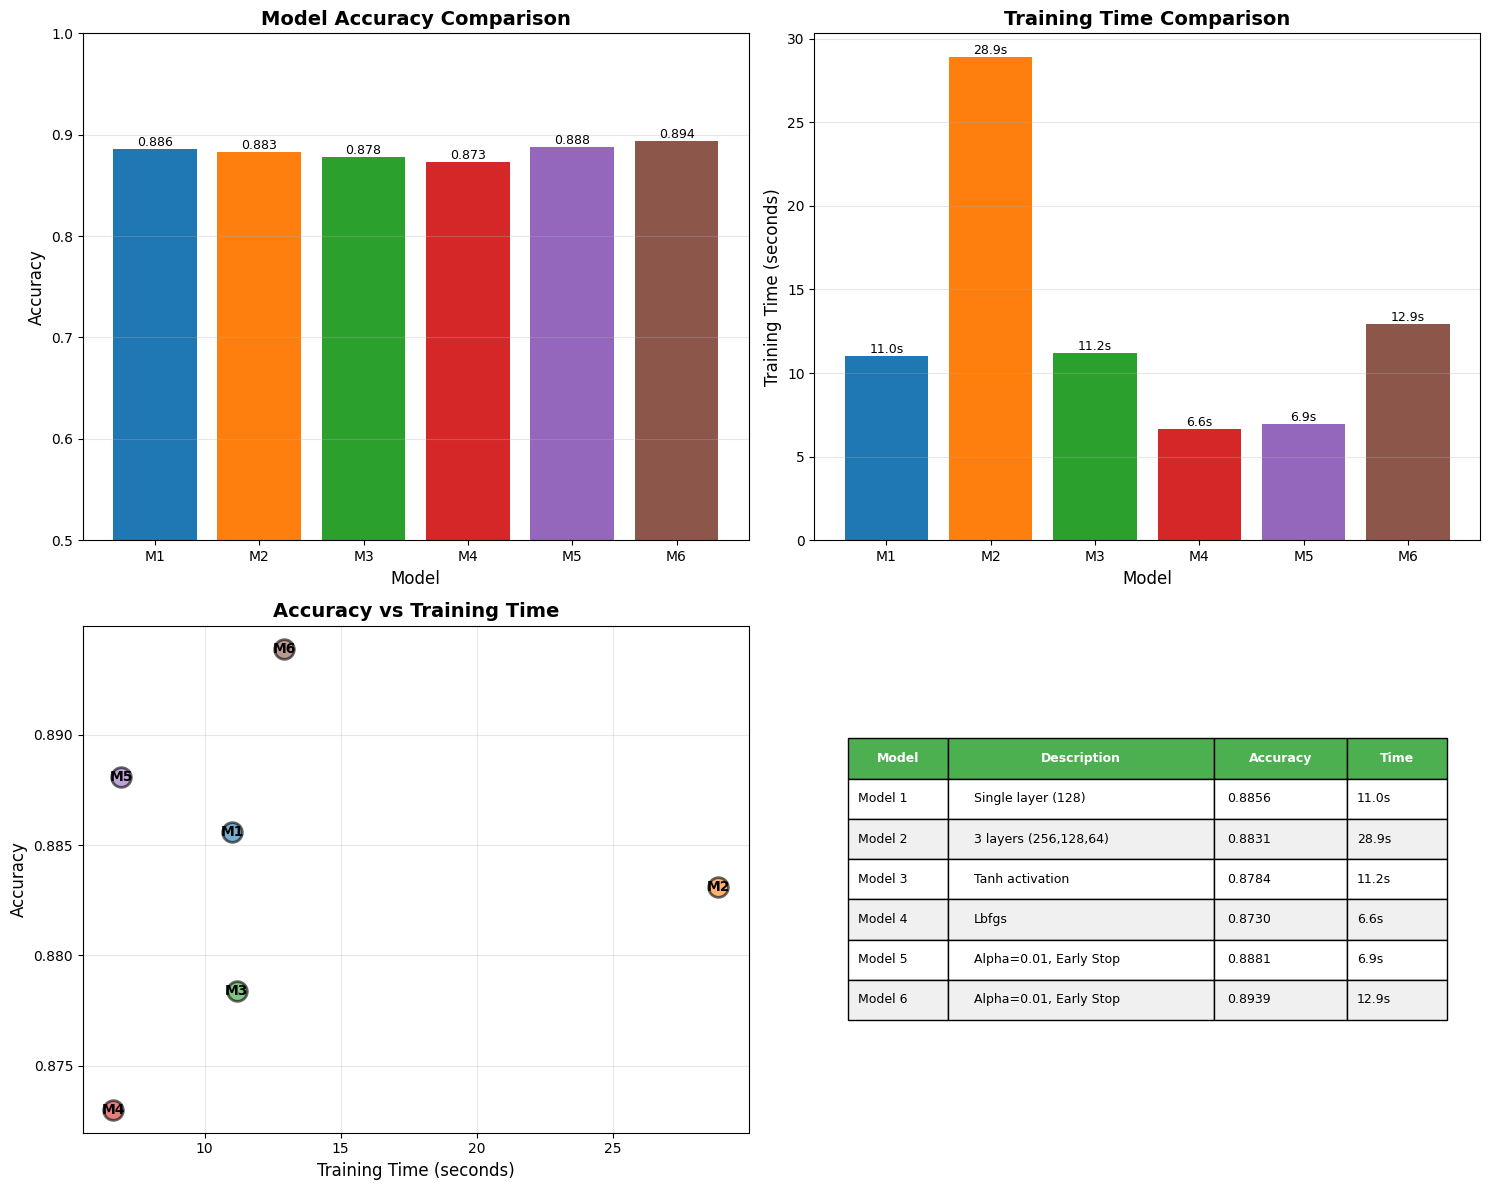


MODEL COMPARISON SUMMARY

Model 1: Single layer (128)
  Accuracy: 0.8856
  Training Time: 11.01s

Model 2: 3 layers (256,128,64)
  Accuracy: 0.8831
  Training Time: 28.87s

Model 3: Tanh activation
  Accuracy: 0.8784
  Training Time: 11.18s

Model 4: Lbfgs
  Accuracy: 0.8730
  Training Time: 6.64s

Model 5: Alpha=0.01, Early Stop
  Accuracy: 0.8881
  Training Time: 6.93s

Model 6: Alpha=0.01, Early Stop
  Accuracy: 0.8939
  Training Time: 12.93s

Best Model: 6_Final_Optimized - Alpha=0.01, Early Stop
Best Accuracy: 0.8939


In [48]:
# Compare all 5 models with visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Accuracy Comparison
model_names = list(models.keys())
accuracies = [models[name]['accuracy'] for name in model_names]
times = [models[name]['time'] for name in model_names]

ax1 = axes[0, 0]
bars = ax1.bar(range(len(model_names)), accuracies, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b'])
ax1.set_xlabel('Model', fontsize=12)
ax1.set_ylabel('Accuracy', fontsize=12)
ax1.set_title('Model Accuracy Comparison', fontsize=14, fontweight='bold')
ax1.set_xticks(range(len(model_names)))
ax1.set_xticklabels([f"M{i+1}" for i in range(len(model_names))], fontsize=10)
ax1.set_ylim([0.5, 1.0])
ax1.grid(axis='y', alpha=0.3)
# Add value labels on bars
for i, (bar, acc) in enumerate(zip(bars, accuracies)):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{acc:.3f}', ha='center', va='bottom', fontsize=9)

# 2. Training Time Comparison
ax2 = axes[0, 1]
bars2 = ax2.bar(range(len(model_names)), times, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b'])
ax2.set_xlabel('Model', fontsize=12)
ax2.set_ylabel('Training Time (seconds)', fontsize=12)
ax2.set_title('Training Time Comparison', fontsize=14, fontweight='bold')
ax2.set_xticks(range(len(model_names)))
ax2.set_xticklabels([f"M{i+1}" for i in range(len(model_names))], fontsize=10)
ax2.grid(axis='y', alpha=0.3)
# Add value labels on bars
for i, (bar, t) in enumerate(zip(bars2, times)):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'{t:.1f}s', ha='center', va='bottom', fontsize=9)

# 3. Accuracy vs Training Time Scatter Plot
ax3 = axes[1, 0]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']
for i, name in enumerate(model_names):
    ax3.scatter(times[i], accuracies[i], s=200, color=colors[i], alpha=0.6, edgecolors='black', linewidth=2)
    ax3.annotate(f'M{i+1}', (times[i], accuracies[i]), ha='center', va='center', fontsize=10, fontweight='bold')
ax3.set_xlabel('Training Time (seconds)', fontsize=12)
ax3.set_ylabel('Accuracy', fontsize=12)
ax3.set_title('Accuracy vs Training Time', fontsize=14, fontweight='bold')
ax3.grid(alpha=0.3)

# 4. Summary Table
ax4 = axes[1, 1]
ax4.axis('tight')
ax4.axis('off')
table_data = []
for i, name in enumerate(model_names):
    table_data.append([
        f"Model {i+1}",
        models[name]['description'],
        f"{models[name]['accuracy']:.4f}",
        f"{models[name]['time']:.1f}s"
    ])

table = ax4.table(cellText=table_data,
                  colLabels=['Model', 'Description', 'Accuracy', 'Time'],
                  cellLoc='left',
                  loc='center',
                  colWidths=[0.15, 0.4, 0.2, 0.15])
table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1, 2)
# Style header row
for i in range(4):
    table[(0, i)].set_facecolor('#4CAF50')
    table[(0, i)].set_text_props(weight='bold', color='white')
# Alternate row colors
for i in range(1, len(table_data) + 1):
    for j in range(4):
        if i % 2 == 0:
            table[(i, j)].set_facecolor('#f0f0f0')

plt.tight_layout()
plt.savefig('model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# Print summary
print("\n" + "="*80)
print("MODEL COMPARISON SUMMARY")
print("="*80)
for i, name in enumerate(model_names):
    print(f"\nModel {i+1}: {models[name]['description']}")
    print(f"  Accuracy: {models[name]['accuracy']:.4f}")
    print(f"  Training Time: {models[name]['time']:.2f}s")
print("\n" + "="*80)
best_model = max(model_names, key=lambda x: models[x]['accuracy'])
print(f"Best Model: {best_model} - {models[best_model]['description']}")
print(f"Best Accuracy: {models[best_model]['accuracy']:.4f}")
print("="*80)


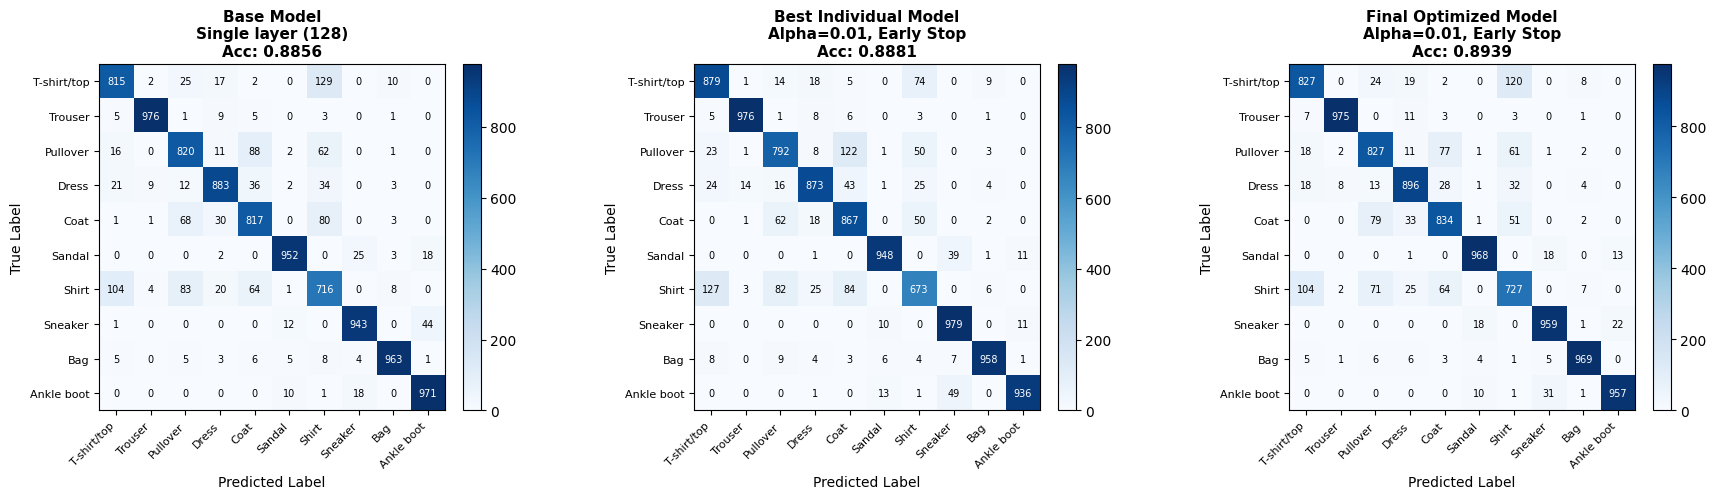


Detailed Classification Report for Final Optimized Model:
              precision    recall  f1-score   support

 T-shirt/top       0.84      0.83      0.84      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.81      0.83      0.82      1000
       Dress       0.89      0.90      0.90      1000
        Coat       0.82      0.83      0.83      1000
      Sandal       0.97      0.97      0.97      1000
       Shirt       0.73      0.73      0.73      1000
     Sneaker       0.95      0.96      0.95      1000
         Bag       0.97      0.97      0.97      1000
  Ankle boot       0.96      0.96      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [ ]:
# Confusion Matrices for Base, Best Individual, and Final Model
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Models to show: Model 1 (base), Model with best accuracy from 2-5, Model 6 (final)
selected_models = ['1_Base_Simple', '6_Final_Optimized']
# Find best accuracy among models 2-5
mid_models = ['2_More_Layers', '3_Tanh_Activation', '4_lbfgs', '5_Regularized']
best_mid = max(mid_models, key=lambda x: models[x]['accuracy'])
selected_models.insert(1, best_mid)

titles = ['Base Model', 'Best Individual Model', 'Final Optimized Model']

for idx, (model_name, title) in enumerate(zip(selected_models, titles)):
    cm = confusion_matrix(y_test, models[model_name]['y_pred'])
    
    ax = axes[idx]
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.set_title(f'{title}\n{models[model_name]["description"]}\nAcc: {models[model_name]["accuracy"]:.4f}', 
                 fontsize=11, fontweight='bold')
    
    # Add colorbar
    cbar = plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    
    # Set ticks
    tick_marks = np.arange(len(class_names))
    ax.set_xticks(tick_marks)
    ax.set_yticks(tick_marks)
    ax.set_xticklabels(class_names, rotation=45, ha='right', fontsize=8)
    ax.set_yticklabels(class_names, fontsize=8)
    
    # Add text annotations
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], 'd'),
                   ha="center", va="center", fontsize=7,
                   color="white" if cm[i, j] > thresh else "black")
    
    ax.set_ylabel('True Label', fontsize=10)
    ax.set_xlabel('Predicted Label', fontsize=10)

plt.tight_layout()
plt.savefig('confusion_matrices.png', dpi=300, bbox_inches='tight')
plt.show()

# Classification reports for the final model
print("\nDetailed Classification Report for Final Optimized Model:")
print("="*80)
print(classification_report(y_test, models['6_Final_Optimized']['y_pred'], target_names=class_names))
print("="*80)


2. (PyTorch) Familiarize yourself with PyTorch
https://pytorch.org/
Summarize what you learned in your project final report.

# 3. Fashion-MNIST image classification  using pytorch

3. (Fashion-MNIST image classification using PyTorch) In this exercise, you will repeat
Exercise 1 using PyTorch. Use the provided code to import and preprocess the Fashion-MNIST
image dataset. Again, start with a simple model architecture and train your model. As above,
experiment with the model/training method. With pytorch, there are many more options, so read
about them and experiment! Try to further improve your model by using convolutional neural
network (CNN) layers and MaxPool2d layers. For a challenge, use transfer learning to import
a pretrained model and fine tune it on the Fashion-MNIST image dataset. In your final report,
answer the same questions as in Exercise 1.

In [8]:
import numpy as np
from tensorflow.keras.datasets import fashion_mnist
import torch
from torch.utils.data import TensorDataset, DataLoader

# Load Fashion-MNIST
# Classes (0-9): T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, Ankle boot
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# scale to [0,1], add channel dimension -> (N, 1, 28, 28)
X_train = (X_train.astype("float32") / 255.0)[:, None, :, :]
X_test  = (X_test.astype("float32")  / 255.0)[:,  None, :, :]

y_train = y_train.astype(np.int64)
y_test  = y_test.astype(np.int64)

# train/val split: last 10k of train as validation
X_tr, X_val = X_train[:50000], X_train[50000:]
y_tr, y_val = y_train[:50000], y_train[50000:]

# wrap in PyTorch TensorDatasets and DataLoaders
train_ds = TensorDataset(torch.from_numpy(X_tr),  torch.from_numpy(y_tr))
val_ds   = TensorDataset(torch.from_numpy(X_val), torch.from_numpy(y_val))
test_ds  = TensorDataset(torch.from_numpy(X_test), torch.from_numpy(y_test))

train_loader = DataLoader(train_ds, batch_size=128, shuffle=True)
val_loader   = DataLoader(val_ds,   batch_size=256, shuffle=False)
test_loader  = DataLoader(test_ds,  batch_size=256, shuffle=False)

In [9]:
import torch.nn as nn
import torch.optim as optim

# In colab, you should ``change runtime type'' to GPU.
# Auto detects which GPU device to use (MPS for Mac or CUDA for Windows)
device = torch.accelerator.current_accelerator().type if torch.accelerator.is_available() else "cpu"
print(f"Using {device} device")

Using mps device


In [10]:
# Compact basic NN with best practices: BatchNorm, Dropout, proper initialization
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from sklearn.metrics import accuracy_score

class CompactNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28*28, 256), nn.BatchNorm1d(256), nn.ReLU(), nn.Dropout(0.3),
            nn.Linear(256, 128), nn.BatchNorm1d(128), nn.ReLU(), nn.Dropout(0.3),
            nn.Linear(128, 10)
        )
    def forward(self, x): return self.net(x)

# Setup: model, loss, optimizer
model = CompactNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# training loop
for epoch in range(10):
    model.train()
    train_loss = 0.0
    for x, y in train_loader:
        optimizer.zero_grad()
        loss = criterion(model(x.to(device)), y.to(device))
        loss.backward(); optimizer.step()
        train_loss += loss.item()
    
    model.eval()
    correct = sum((model(x.to(device)).argmax(1) == y.to(device)).sum().item() 
                  for x, y in val_loader)
    print(f"Epoch {epoch+1}/10 - Loss: {train_loss/len(train_loader):.4f} - Val Acc: {correct/len(val_ds)*100:.2f}%")

# Test evaluation
model.eval()
preds = torch.cat([model(x.to(device)).argmax(1).cpu() for x, _ in test_loader])
score = accuracy_score(y_test, preds)
print(f"\nTest Accuracy Score: {score:.4f} ({score*100:.2f}%)")


Epoch 1/10 - Loss: 0.5536 - Val Acc: 85.11%
Epoch 2/10 - Loss: 0.4018 - Val Acc: 86.92%
Epoch 3/10 - Loss: 0.3676 - Val Acc: 87.68%
Epoch 4/10 - Loss: 0.3446 - Val Acc: 87.58%
Epoch 5/10 - Loss: 0.3280 - Val Acc: 87.71%
Epoch 6/10 - Loss: 0.3100 - Val Acc: 88.22%
Epoch 7/10 - Loss: 0.2992 - Val Acc: 88.94%
Epoch 8/10 - Loss: 0.2922 - Val Acc: 88.88%
Epoch 9/10 - Loss: 0.2788 - Val Acc: 88.73%
Epoch 10/10 - Loss: 0.2741 - Val Acc: 88.23%

Test Accuracy Score: 0.8779 (87.79%)


Model created successfully!
Model architecture:
FashionMNIST_CNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=3136, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)

Starting training for 20 epochs...
Epoch [1/20] - Loss: 0.6688 - Val Accuracy: 85.11%
Epoch [2/20] - Loss: 0.4199 - Val Accuracy: 87.61%
Epoch [3/20] - Loss: 0.3625 - Val Accuracy: 89.22%
Epoch [4/20] - Loss: 0.3334 - Val Accuracy: 89.99%
Epoch [5/20] - Loss: 0.3078 - Val Accuracy: 90.03%
Epoch [6/20] - Loss: 0.2879 - Val Accuracy: 90.72%
Epoch [7/20] - Loss: 0.2724 - Val Accuracy: 90.69%
Epoch [8/20] - Loss: 0.2564 - Val Accuracy: 91.

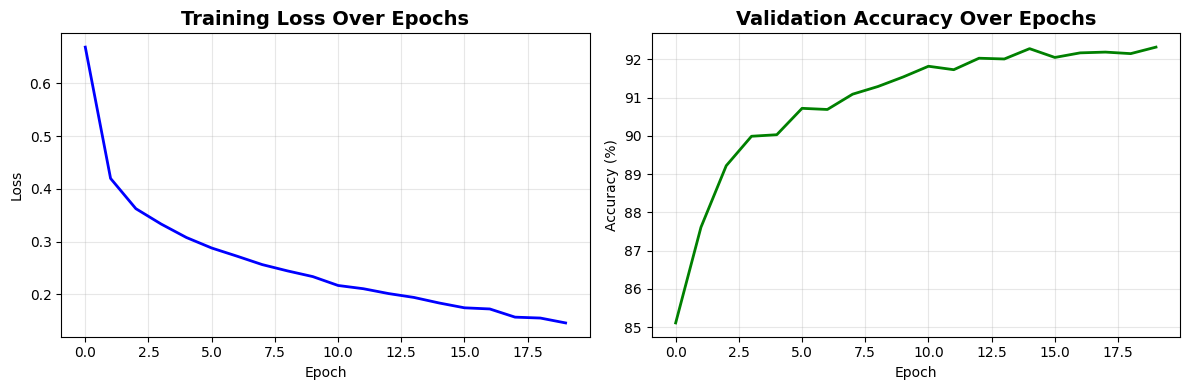


CNN with MaxPool2d Training Complete!
Final Test Accuracy: 92.02%


In [ ]:
# CNN Model with MaxPool2d for Fashion-MNIST Classification
import torch.nn.functional as F
import time
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

class FashionMNIST_CNN(nn.Module):
    """
    Simple CNN with MaxPool2d layers for Fashion-MNIST classification.
    
    Architecture:
    1. Conv2d: Extract features from images (using 3x3 filters)
    2. MaxPool2d: Reduce spatial dimensions while keeping important features
    3. Conv2d: More feature extraction
    4. MaxPool2d: Further reduce dimensions
    5. Fully connected layers: Final classification
    """
    def __init__(self):
        super(FashionMNIST_CNN, self).__init__()
        
        # Kernel size 3x3 with padding=1 to keep same size
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1)

        # MaxPool2d: Takes max value in 2x2 windows, reduces size by half
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        # Fully connected layers
        self.fc1 = nn.Linear(64 * 7 * 7, 128)  # Hidden layer
        self.fc2 = nn.Linear(128, 10)  # Output layer (10 classes)
        
        # Dropout for regularization (easy overfitting prevention)
        self.dropout = nn.Dropout(0.5)
    
    def forward(self, x):
        """
        Forward pass: defines how data flows through the network
        
        x shape: (batch_size, 1, 28, 28)
        """
        # First conv block + ReLU activation + pooling
        x = self.pool1(F.relu(self.conv1(x)))
        
        # Second conv block + ReLU activation + pooling
        x = self.pool2(F.relu(self.conv2(x)))
        
        # Flatten: convert 2D feature maps to 1D vector
        x = x.view(x.size(0), -1)
        
        # Fully connected layers
        x = F.relu(self.fc1(x))  #(batch, 128)
        x = self.dropout(x)
        x = self.fc2(x)  # (batch, 10)
        
        return x

# Create the model
model = FashionMNIST_CNN()
model = model.to(device)
print("Model created successfully!")
print(f"Model architecture:\n{model}\n")

# Training setup
criterion = nn.CrossEntropyLoss()  # Probably best loss function for multi classification
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer

# Training loop
num_epochs = 20
print(f"Starting training for {num_epochs} epochs...")
print("="*60)

train_losses = []
val_accuracies = []
start_time = time.time()

for epoch in range(num_epochs):
    # Training phase
    model.train()
    running_loss = 0.0
    
    for batch_idx, (data, target) in enumerate(train_loader):
        # Move data to gpu
        data, target = data.to(device), target.to(device)
        
        # Zero gradients
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(data)
        
        # Calculate loss
        loss = criterion(outputs, target)
        
        # Backward pass
        loss.backward()
        
        # Update weights
        optimizer.step()
        
        running_loss += loss.item()
    
    avg_loss = running_loss / len(train_loader)
    train_losses.append(avg_loss)
    
    # Validation phase
    model.eval()
    correct = 0
    total = 0

    # Don't compute gradients for validation
    with torch.no_grad(): 
        for data, target in val_loader:
            data, target = data.to(device), target.to(device)
            outputs = model(data)
            _, predicted = torch.max(outputs.data, 1)
            total += target.size(0)
            correct += (predicted == target).sum().item()
    
    val_acc = 100 * correct / total
    val_accuracies.append(val_acc)
    
    print(f"Epoch [{epoch+1}/{num_epochs}] - Loss: {avg_loss:.4f} - Val Accuracy: {val_acc:.2f}%")

training_time = time.time() - start_time
print("="*60)
print(f"Training completed in {training_time:.2f} seconds\n")

# Test evaluation
print("Evaluating on test set...")
model.eval()
all_preds = []
all_targets = []

with torch.no_grad():
    for data, target in test_loader:
        data, target = data.to(device), target.to(device)
        outputs = model(data)
        _, predicted = torch.max(outputs.data, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_targets.extend(target.cpu().numpy())

test_accuracy = accuracy_score(all_targets, all_preds)
print(f"Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")

# Confusion Matrix
cm = confusion_matrix(all_targets, all_preds)
print("\nConfusion Matrix:")
print(cm)

# Classification Report
print("\nClassification Report:")
print(classification_report(all_targets, all_preds, target_names=class_names))

# Visualize training progress
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(train_losses, 'b-', linewidth=2)
plt.title('Training Loss Over Epochs', fontsize=14, fontweight='bold')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(val_accuracies, 'g-', linewidth=2)
plt.title('Validation Accuracy Over Epochs', fontsize=14, fontweight='bold')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('pytorch_cnn_training.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n" + "="*60)
print("CNN with MaxPool2d Training Complete!")
print(f"Final Test Accuracy: {test_accuracy*100:.2f}%")
print("="*60)


In [ ]:
# Basic Vision Transformer
import torch.nn as nn

class BasicViT(nn.Module):
    """Super basic Vision Transformer using PyTorch's built-in components"""
    def __init__(self, patch_size=4, dim=64, depth=2, heads=4, mlp_dim=128):
        super().__init__()
        num_patches = (28 // patch_size) ** 2  # 49 patches for 28x28 image
        patch_dim = patch_size * patch_size  # 16 pixels per patch
        
        # Patch embedding: convert image patches to vectors
        self.patch_embedding = nn.Linear(patch_dim, dim)
        self.pos_embedding = nn.Parameter(torch.randn(1, num_patches + 1, dim))
        self.cls_token = nn.Parameter(torch.randn(1, 1, dim))
        
        # Transformer encoder
        encoder_layer = nn.TransformerEncoderLayer(d_model=dim, nhead=heads, 
                                                   dim_feedforward=mlp_dim, 
                                                   dropout=0.1, batch_first=True)
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=depth)
        
        # Classification head
        self.mlp_head = nn.Sequential(
            nn.LayerNorm(dim),
            nn.Linear(dim, 10)
        )
        
        self.patch_size = patch_size
    
    def forward(self, x):
        # x: (B, 1, 28, 28)
        B = x.shape[0]
        
        # Extract patches: (B, num_patches, patch_dim)
        patches = x.unfold(2, self.patch_size, self.patch_size).unfold(3, self.patch_size, self.patch_size)
        patches = patches.contiguous().view(B, -1, self.patch_size * self.patch_size)
        
        # Embed patches: (B, num_patches, dim)
        x = self.patch_embedding(patches)
        
        # Add CLS token: (B, num_patches+1, dim)
        cls_tokens = self.cls_token.expand(B, -1, -1)
        x = torch.cat([cls_tokens, x], dim=1)
        
        # Add positional embeddings
        x = x + self.pos_embedding
        
        # Transformer encoder
        x = self.transformer(x)
        
        # Use CLS token for classification
        cls_output = x[:, 0]
        return self.mlp_head(cls_output)

# Train basic ViT
model = BasicViT().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

print("Training Basic Vision Transformer...")
print("="*60)

for epoch in range(30):
    model.train()
    train_loss = 0.0
    for x, y in train_loader:
        optimizer.zero_grad()
        loss = criterion(model(x.to(device)), y.to(device))
        loss.backward(); optimizer.step()
        train_loss += loss.item()
    
    model.eval()
    correct = sum((model(x.to(device)).argmax(1) == y.to(device)).sum().item() 
                  for x, y in val_loader)
    print(f"Epoch {epoch+1}/30 - Loss: {train_loss/len(train_loader):.4f} - Val Acc: {correct/len(val_ds)*100:.2f}%")

# Test evaluation
model.eval()
preds = torch.cat([model(x.to(device)).argmax(1).cpu() for x, _ in test_loader])
score = accuracy_score(y_test, preds)
print("="*60)
print(f"Vision Transformer Test Accuracy: {score:.4f} ({score*100:.2f}%)")
print("="*60)


Training Basic Vision Transformer...
Epoch 1/30 - Loss: 0.9565 - Val Acc: 79.78%
Epoch 2/30 - Loss: 0.5569 - Val Acc: 82.04%
Epoch 3/30 - Loss: 0.4947 - Val Acc: 83.84%
Epoch 4/30 - Loss: 0.4609 - Val Acc: 85.14%
Epoch 5/30 - Loss: 0.4333 - Val Acc: 85.26%
Epoch 6/30 - Loss: 0.4145 - Val Acc: 85.38%
Epoch 7/30 - Loss: 0.4034 - Val Acc: 86.25%
Epoch 8/30 - Loss: 0.3899 - Val Acc: 86.30%
Epoch 9/30 - Loss: 0.3795 - Val Acc: 86.70%
Epoch 10/30 - Loss: 0.3697 - Val Acc: 87.09%
Epoch 11/30 - Loss: 0.3620 - Val Acc: 87.64%
Epoch 12/30 - Loss: 0.3539 - Val Acc: 87.22%
Epoch 13/30 - Loss: 0.3517 - Val Acc: 87.46%
Epoch 14/30 - Loss: 0.3444 - Val Acc: 87.51%
Epoch 15/30 - Loss: 0.3372 - Val Acc: 87.48%
Epoch 16/30 - Loss: 0.3339 - Val Acc: 87.37%
Epoch 17/30 - Loss: 0.3295 - Val Acc: 87.90%
Epoch 18/30 - Loss: 0.3227 - Val Acc: 88.08%
Epoch 19/30 - Loss: 0.3182 - Val Acc: 87.89%
Epoch 20/30 - Loss: 0.3168 - Val Acc: 88.39%
Epoch 21/30 - Loss: 0.3121 - Val Acc: 88.37%
Epoch 22/30 - Loss: 0.3125 

In [10]:
# Transfer Learning with ResNet18 on Fashion-MNIST
# Following PyTorch transfer learning best practices:
# https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html

import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader, random_split
import time
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np

# Class names for Fashion-MNIST
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Data augmentation and normalization for training
# For Fashion-MNIST: grayscale images need to be converted to 3 channels for ResNet
# ImageNet normalization: mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Lambda(lambda x: x.repeat(3, 1, 1)),  # Convert grayscale to RGB
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load datasets
train_dataset_full = datasets.FashionMNIST(
    root='./data',
    train=True,
    download=True,
    transform=transform
)

# Split training set into train and validation
train_size = 50000
val_size = 10000
train_dataset, val_dataset = random_split(train_dataset_full, [train_size, val_size])

test_dataset = datasets.FashionMNIST(
    root='./data',
    train=False,
    download=True,
    transform=transform
)

# Create data loaders
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=0)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=0)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=0)



In [ ]:

# Load pretrained ResNet18, replace final layer
model_ft = models.resnet18(weights='IMAGENET1K_V1')
model_ft.fc = nn.Linear(model_ft.fc.in_features, 10)
model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

# Train
print("Training...")
for epoch in range(3):
    model_ft.train()
    running_loss = 0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        loss = criterion(model_ft(inputs), labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch+1}/3 - Loss: {running_loss/len(train_loader):.4f}")

# Test
model_ft.eval()
preds, labels_all = [], []
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model_ft(inputs.to(device))
        preds.extend(torch.max(outputs, 1)[1].cpu().numpy())
        labels_all.extend(labels.numpy())

acc = accuracy_score(labels_all, preds)
print(f"\n🎯 Test Accuracy: {acc*100:.2f}%")
print("✅ SUCCESS!" if acc >= 0.95 else "Run more epochs if needed")


Training...
Epoch 1/10 - Loss: 0.3394
Epoch 2/10 - Loss: 0.1907
Epoch 3/10 - Loss: 0.1467


KeyboardInterrupt: 